In [1]:
#setup 
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [2]:

pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
new_table = pd.read_csv('https://raw.githubusercontent.com/giobbu/App_Traff_Forecast_DeapLearn/master/data/Flow_BEL_street_30min.csv')

In [4]:
#each column is a street identifier
new_table

,datetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,5187.0,5188.0,5189.0,5190.0,5191.0,5192.0,5193.0,5194.0,5195.0,5196.0
0,2019-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-01 01:30:00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2019-01-01 02:00:00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,2019-02-28 21:30:00,1.0,2.0,2.0,3.0,11.0,0.0,0.0,0.0,2.0,...,2.0,8.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,3.0
2828,2019-02-28 22:00:00,2.0,4.0,3.0,1.0,10.0,0.0,0.0,0.0,4.0,...,10.0,3.0,0.0,4.0,0.0,1.0,2.0,1.0,1.0,1.0
2829,2019-02-28 22:30:00,2.0,8.0,1.0,0.0,8.0,0.0,0.0,0.0,5.0,...,21.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
2830,2019-02-28 23:00:00,4.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,5.0,...,10.0,5.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0


In [5]:
# this source: 
# the https://www.kaggle.com/code/giobbu/seasonal-persistence-model/notebook#Results-Comparison-between-Seasonal-model-(baseline)-and-LSTM-encoder-decoder-model
# selects the roads that have an average traffic flow of 10 or larger, we also do this, this code is from the notebook listed above 

table_index = new_table.iloc[:,1:]
ALL_STREETS = list(table_index.columns.values)

mean_flow =[]
new_street=[]

mean_value = 10

for street in ALL_STREETS:
    
    single_street=table_index[street]
    mean = np.mean(single_street)
    mean_flow.append(mean)
    new_street.append(street)
    
    
df_mean_flow = pd.DataFrame({'street_index':new_street, 'mean_flow': mean_flow})
print('')
print(df_mean_flow.head())
print('')

STREETS = df_mean_flow[(df_mean_flow['mean_flow'] >= mean_value)] 
STREETS = STREETS.sort_values(by=['street_index'])
STREETS = list(STREETS.street_index)


print('considering a average traffic flow of ' + str(mean_value)+' per street')
print('')
print('mean traffic flow '+str(mean_value)+ ' ---> number of street segments: ' + str(len(STREETS)))


  street_index  mean_flow
0          0.0   4.048023
1          1.0  16.350282
2          2.0   6.511299
3          3.0   7.681850
4          4.0   9.484463

considering a average traffic flow of 10 per street

mean traffic flow 10 ---> number of street segments: 2293


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


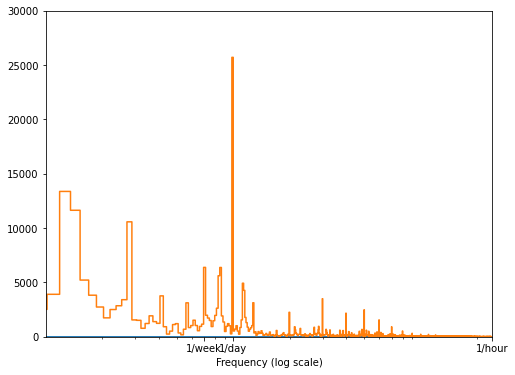

In [6]:
#use fast fourier transform to identify important time periods 
plt.plot(new_table['datetime'],new_table.mean(axis= 1))
fft = tf.signal.rfft(new_table.mean(axis=1))
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(new_table.mean(axis=1))/2
hours_per_day = 24
hours_per_dataset = n_samples_h/(hours_per_day)

f_per_day = f_per_dataset/hours_per_dataset
plt.step(f_per_day, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 30000)
plt.xlim([0.1, 1])
plt.xticks([0.7,1, 24], labels=['1/week','1/day', '1/hour'])
_ = plt.xlabel('Frequency (log scale)')

In [7]:
df_mean_flow

,street_index,mean_flow
0,0.0,4.048023
1,1.0,16.350282
2,2.0,6.511299
3,3.0,7.681850
4,4.0,9.484463
...,...,...
5181,5192.0,2.612641
5182,5193.0,2.862994
5183,5194.0,0.357345
5184,5195.0,5.661723


In [8]:
 new_table['datetime'] = pd.to_datetime(new_table['datetime'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


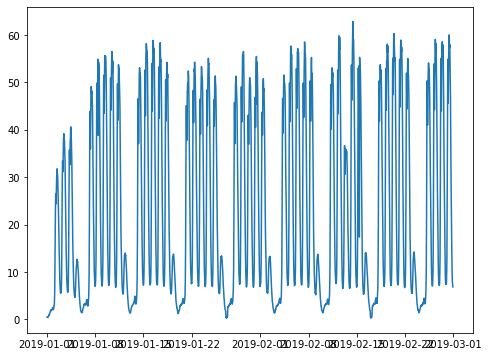

In [9]:
plt.plot(new_table['datetime'],new_table.mean(axis = 1))

In [10]:
from tensorflow.python.ops.gen_array_ops import fake_quant_with_min_max_vars_per_channel
#we need to create "windows" in the data --> 
#X: input tensor : use a window of size s, lets say 5, as X
#Y: output vector : traffic for hour six predicted based on the previous window 
#this function does this 
def df_to_x_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  Y = []
  for i in range((len(df_as_np))-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]] #the brackets here are what makes it a tensor not a matrix 
    X.append(row)
    label = df_as_np[i+window_size] #this is the 6th value
    Y.append(label)
  return np.array(X), np.array(Y)


#this is the window function for multiple input features and multiple output pairs
#what's the difference between df_to_x_y2 and df_to_x_y --> the first one is just for one input vector (ie the data from one street) this 
#version accepts many columns of data (all the street values and the transformed time data)
def df_to_x_y2(df, window_size): 
  feat_time = 3
  #df_as_np = df.to_numpy()
  df_as_np = df
  X = []
  Y = []
  for i in range((len(df_as_np))-window_size):
    row = [r for r in df_as_np[i:i+window_size]] #the brackets here are what makes it a tensor not a matrix
    X.append(row)
    label = [df_as_np[i+window_size][0:-feat_time]] #this is all of the traffic values (w/0 the time features)
    Y.append(label)
  return np.array(X), np.array(Y)

In [11]:
df = new_table
df = df[STREETS + ['datetime']] 
print(df['datetime'])

0      2019-01-01 00:00:00
1      2019-01-01 00:30:00
2      2019-01-01 01:00:00
3      2019-01-01 01:30:00
4      2019-01-01 02:00:00
               ...        
2827   2019-02-28 21:30:00
2828   2019-02-28 22:00:00
2829   2019-02-28 22:30:00
2830   2019-02-28 23:00:00
2831   2019-02-28 23:30:00
Name: datetime, Length: 2832, dtype: datetime64[ns]


In [12]:
#this is for transforming datetime to recognizable inputs 
#sin and cos transformation for hour of the day 
df = new_table
df = df[STREETS + ['datetime']] 
df['hour'] = df['datetime'].dt.hour
df['hour_sin'] = np.sin(df['hour']*2* np.pi/23)
df['hour_cos'] = np.cos(df['hour']*2* np.pi/23)
df['day_of_week'] = df['datetime'].dt.dayofweek
 #this removes all of the streets with aveage flow <10 
df = df.drop(['hour','datetime'],axis = 1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,1.0,1001.0,1004.0,1005.0,1006.0,101.0,1010.0,1012.0,1013.0,1014.0,...,983.0,987.0,993.0,994.0,995.0,996.0,997.0,hour_sin,hour_cos,day_of_week
0,0.0,2.0,0.0,0.0,0.0,5.0,2.0,1.0,3.0,4.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1
1,0.0,1.0,0.0,0.0,1.0,5.0,1.0,0.0,2.0,2.0,...,2.0,3.0,0.0,1.0,1.0,0.0,3.0,0.000000,1.000000,1
2,0.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,4.0,1.0,...,7.0,2.0,2.0,1.0,0.0,0.0,2.0,0.269797,0.962917,1
3,1.0,7.0,1.0,0.0,1.0,2.0,6.0,0.0,1.0,2.0,...,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.269797,0.962917,1
4,1.0,0.0,4.0,0.0,0.0,3.0,2.0,0.0,3.0,1.0,...,1.0,0.0,0.0,3.0,1.0,1.0,0.0,0.519584,0.854419,1


In [13]:
#test the function above with the data from one street, note the shape of the output X
test_data = new_table['4.0']
x,y = df_to_x_y(test_data,5)
print(x.shape, y.shape)
print(x[200])
print(y[200])

(2827, 5, 1) (2827,)
[[12.]
 [10.]
 [ 3.]
 [ 2.]
 [ 6.]]
1.0


In [14]:
#test the funciton with multi factor indexing 
#test_data2 = df[['997.0','1006.0','hour_sin','hour_cos','day_of_week']]
#est_data2.head()
#x2,y2 = df_to_x_y2(test_data2,5)
#print(x2.shape,y2.shape)
#print(x2[200])
#print(y2[200])

In [15]:
#@title
from sklearn.preprocessing import MinMaxScaler
#split the data into training, val, and test sets, the step sizes and scaling were coppied from the following source
#https://www.kaggle.com/code/giobbu/lstm-encoder-decoder-tensorflow/notebook#SPLITTING-Training/Testing
val_step = 168*2 + 168*2 # 2 WEEKS
test_step = 168*2 # 1 WEEK

#feat_time is the number of time related features we have 
feat_time = 3

#we will scale the data so the traffic features are within a range of 0 -1 
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_aux = MinMaxScaler(feature_range=(0, 1))

#"both" below means that this data has not yet been separated into input and output vectors 
train_both = df[:-val_step]
train_feat = scaler.fit_transform(train_both.values[:,:-feat_time]) # we do not want to transform the time features, only the traffic speed ones 

#validation 
VAL = df[-val_step : -test_step]
valid_feat = scaler.transform(VAL.values[:,:-feat_time])

# TESTING SET
TEST = df[-test_step:]
test_feat = scaler.transform(TEST.values[:,:-feat_time])

#the AUX values here are all the time features we removed when we transformed the flow data to the correct scale
AUX = scaler_aux.fit_transform(df.values[:,-feat_time:])
train_aux = AUX[: -val_step] #time features for train set
valid_aux = AUX[-val_step: -test_step]  #time features for val set
test_aux = AUX[-test_step:]  #time features for test set 

#now we concatenate the traffic features flow features and time features
train_feat = np.hstack([train_feat, train_aux])
valid_feat = np.hstack([valid_feat, valid_aux])
test_feat = np.hstack([test_feat, test_aux]) 



The hidden cell above is how the paper divides the data into train and test, I made some other functions that do the same thing but I think makes the process clearer 

In [16]:
#we need to scale the traffic speed data, the paper uses minmaxscaler and concatenates the results, we will follow this same process 
#there are two scalers, one for traffic features and one for time features 

def preprocess(X):
  from sklearn.preprocessing import MinMaxScaler
  feat_time = 3
  scaler_traffic = MinMaxScaler(feature_range=(0, 1))
  scaler_time = MinMaxScaler(feature_range=(0, 1))
  x_traffic = X[:,:-feat_time]
  x_time = X[:,-feat_time:]
  x_traffic_scaled = scaler_traffic.fit_transform(x_traffic)
  x_time_scaled = scaler_time.fit_transform(x_time)
  X[:,:-feat_time] = x_traffic_scaled
  X[:,-feat_time:] = x_time_scaled 


In [17]:
#preprocess the data st all features (traffic rate and time) are in a processable sclae 
df_as_np = df.to_numpy()
print('before scaling: \n ', df_as_np[0:3][:])
preprocess(df_as_np)
print('after scaling: \n' , df_as_np[0:3][:])

#note that all values are between 0 and 1 in the scaled version!

before scaling: 
  [[0.         2.         0.         ... 0.         1.         1.        ]
 [0.         1.         0.         ... 0.         1.         1.        ]
 [0.         3.         1.         ... 0.26979677 0.96291729 1.        ]]
after scaling: 
 [[0.         0.01020408 0.         ... 0.5        1.         0.16666667]
 [0.         0.00510204 0.         ... 0.5        1.         0.16666667]
 [0.         0.01530612 0.00613497 ... 0.6352136  0.98137189 0.16666667]]


In [18]:
#using a window size of 12
x3, y3 = df_to_x_y2(df_as_np,12)
x3.shape,y3.shape
#note that the input feature vector is 3 features longer than the output, this is the time data (we are not predicting this)

((2820, 12, 2296), (2820, 1, 2293))

In [19]:
#step sizes are from the source listed above 
val_step = 168*2 + 168*2 # 2 WEEKS
test_step = 168*2 # 1 WEEK

#val will be the second to last week in the set 
#test will be the last week in the set 
val_s = 2820 - val_step
test_s = 2820 - test_step

x3_train, y3_train = x3[:val_s],y3[:val_s]
x3_val, y3_val = x3[val_s:test_s],y3[val_s:test_s]
x3_test, y3_test = x3[test_s:],y3[test_s:]

x3_train.shape, y3_train.shape, x3_val.shape, y3_val.shape, x3_test.shape, y3_test.shape

((2148, 12, 2296),
 (2148, 1, 2293),
 (336, 12, 2296),
 (336, 1, 2293),
 (336, 12, 2296),
 (336, 1, 2293))

In [20]:
#START OF TRANSFORMER STUFF (everything before this is preparation)
#a lot of this is coppied from https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/transformer.ipynb#scrollTo=5VLa5QcdPpv5
#This source will be referenced as: language transformer

In [21]:
#we need to convert the np arrays to the correct data type (class 'tensorflow.python.framework.ops.EagerTensor')
#this took me forever to figure out rip :/

x3_train = tf.constant(x3_train)
y3_train = tf.constant(y3_train)
x3_test = tf.constant(x3_test)
y3_test = tf.constant(y3_test)
x3_val = tf.constant(x3_val)
y3_val = tf.constant(y3_val)
print(type(x3_train), 'WOO!')

<class 'tensorflow.python.framework.ops.EagerTensor'> WOO!


In [22]:
class BaseAttention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

In [23]:
class CrossAttention(BaseAttention):
  def call(self, x, context):
    attn_output, attn_scores = self.mha(
        query=x,
        key=context,
        value=context,
        return_attention_scores=True)
   
    # Cache the attention scores for plotting later.
    self.last_attn_scores = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

In [24]:
sample_ca = CrossAttention(num_heads = 2, key_dim = 2296)

In [25]:
x3_test = tf.constant(x3_test)
type(x3_test)
y3_test =  tf.constant(y3_test)
type(y3_test)

tensorflow.python.framework.ops.EagerTensor

In [26]:
print(x3_test.shape)
print(y3_test.shape)
print(sample_ca(y3_test,x3_test).shape)

(336, 12, 2296)
(336, 1, 2293)
(336, 1, 2293)


In [27]:
#in globalself attention, we are comparing every token to iteself within the same sequence of tokens, here the query and value are both = x
class GlobalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [28]:

sample_gsa = GlobalSelfAttention(num_heads=2, key_dim=2293)

print(y3_test.shape)
print(sample_gsa(y3_test).shape)

(336, 1, 2293)
(336, 1, 2293)


In [29]:
class CausalSelfAttention(BaseAttention):
  def call(self, x):
    causal_mask = tf.linalg.band_part(tf.ones((x.shape[0],x.shape[1],x.shape[1])),0,-1)
    attn_output = self.mha(
        query=x,
        value=x,
        key=x,
        attention_mask = causal_mask)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [30]:
sample_csa = CausalSelfAttention(num_heads=2, key_dim=2296)
sample_csa(x3_train[:,:,0:2296]).shape



TensorShape([2148, 12, 2296])

In [31]:
class FeedForward(tf.keras.layers.Layer):
  def __init__(self, d_model, dff, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),
      tf.keras.layers.Dense(d_model),
      tf.keras.layers.Dropout(dropout_rate)
    ])
    self.add = tf.keras.layers.Add()
    self.layer_norm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    x = self.add([x, self.seq(x)])
    x = self.layer_norm(x) 
    return x

In [39]:
sample_ffn = FeedForward(2296,2293)

print(x3_test.shape)
print(sample_ffn(x3_test).shape)

(336, 12, 2296)
(336, 12, 2296)


In [34]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self,
               *,
               d_model,
               num_heads,
               dff,
               dropout_rate=0.1):
    super(DecoderLayer, self).__init__()

    self.causal_self_attention = CausalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.cross_attention = CrossAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x, context):
    x = self.causal_self_attention(x=x)
    x = self.cross_attention(x=x, context=context)

    # Cache the last attention scores for plotting later
    self.last_attn_scores = self.cross_attention.last_attn_scores
    print(x.shape)

    x = self.ffn(x)  # Shape `(batch_size, seq_len, d_model)`.
    return x

In [44]:
sample_decoder_layer = DecoderLayer(d_model=2293, num_heads=8, dff=2296
                                    )


print(sample_ca(y3_test,x3_test).shape)
sample_decoder_layer_output = sample_decoder_layer(x=y3_test, context=x3_test)

print(y3_test.shape)
print(x3_test.shape)
print(sample_decoder_layer_output.shape)  # `(batch_size, seq_len, d_model)`

(336, 1, 2293)
(336, 1, 2293)
(336, 1, 2293)
(336, 12, 2296)
(336, 1, 2293)


In [45]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads, dff,
               dropout_rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    self.dropout = tf.keras.layers.Dropout(dropout_rate)
    self.dec_layers = [
        DecoderLayer(d_model=d_model, num_heads=num_heads,
                     dff=dff, dropout_rate=dropout_rate)
        for _ in range(num_layers)]

    self.last_attn_scores = None

  def call(self, x, context):
    # x is (batch_size, target_seq_len, d_model)

    x = self.dropout(x)

    for i in range(self.num_layers):
      x  = self.dec_layers[i](x, context)

    self.last_attn_scores = self.dec_layers[-1].last_attn_scores

    # The shape of x is (batch_size, target_seq_len, d_model).
    return x


In [ ]:
# Instantiate the decoder.
sample_decoder = Decoder(num_layers=4,
                         d_model=2293,
                         num_heads=8,
                         dff=2296)

output = sample_decoder(
    x=y3_test,
    context=x3_test)

# Print the shapes.

print(x3_test.shape)
print(output.shape)
 

(336, 1, 2293)
